# **Projeto de Previsão de Salário com Machine Learning**

**Autor:** Obede Vieira

**Descrição:**
Este projeto demonstra a construção de um modelo de machine learning para prever o salário de um profissional com base em seus anos de experiência. O notebook abrange todo o ciclo de vida de um projeto de ciência de dados, desde a análise exploratória dos dados até a implantação de um modelo preditivo.

In [8]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [9]:
# Lendo os dados
Base_Dados = pd.read_csv('Salary_Data.csv')

# Verificando
Base_Dados.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
# Renomenado as colunas
Base_Dados.rename( columns={
    'YearsExperience' : 'Xp',
    'Salary' : 'Renda'
}, inplace=True )

In [11]:
# dimensao
Base_Dados.shape

(30, 2)

In [12]:
# Campos nulos
Base_Dados.isnull().sum()

,0
Xp,0
Renda,0


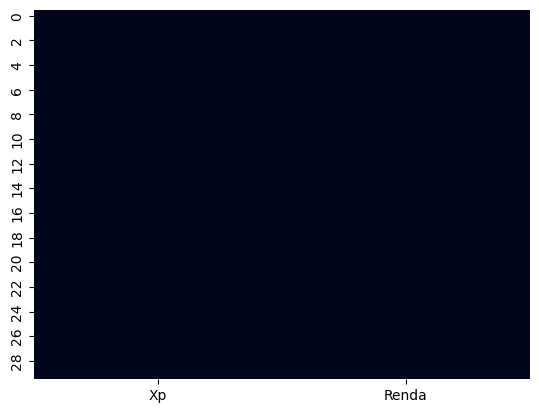

In [13]:
# Grafico Nulos
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [14]:
Base_Dados.describe()

,Xp,Renda
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


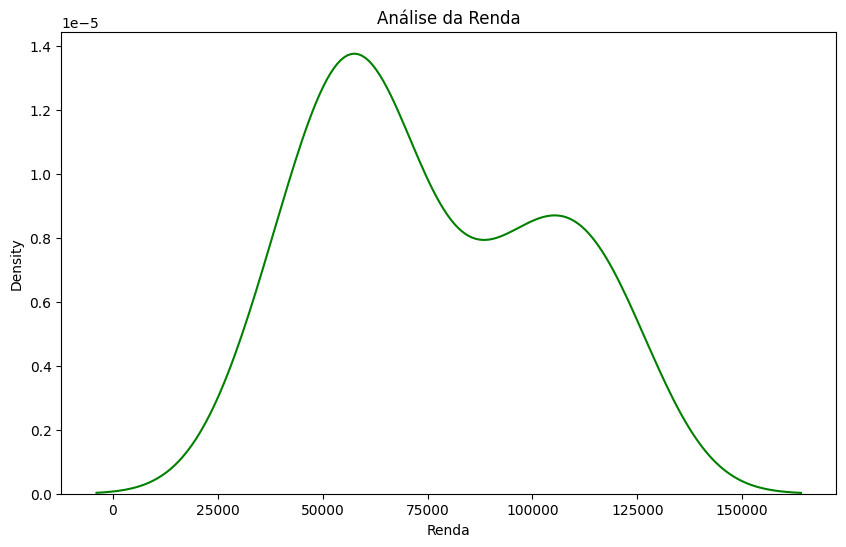

In [15]:
plt.figure( figsize=(10, 6) )
plt.title('Análise da Renda')
sns.kdeplot( Base_Dados['Renda'], color='green' );

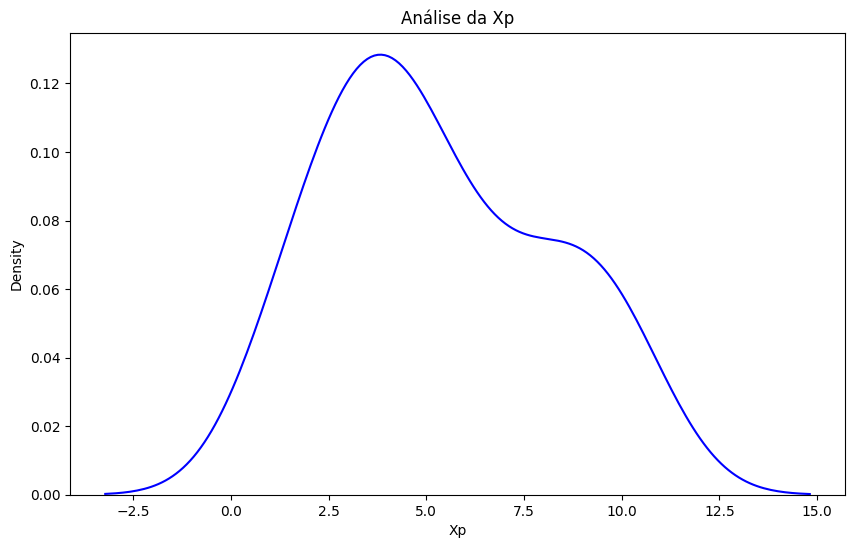

In [16]:
plt.figure( figsize=(10, 6) )
plt.title('Análise da Xp')
sns.kdeplot( Base_Dados['Xp'], color='blue' );

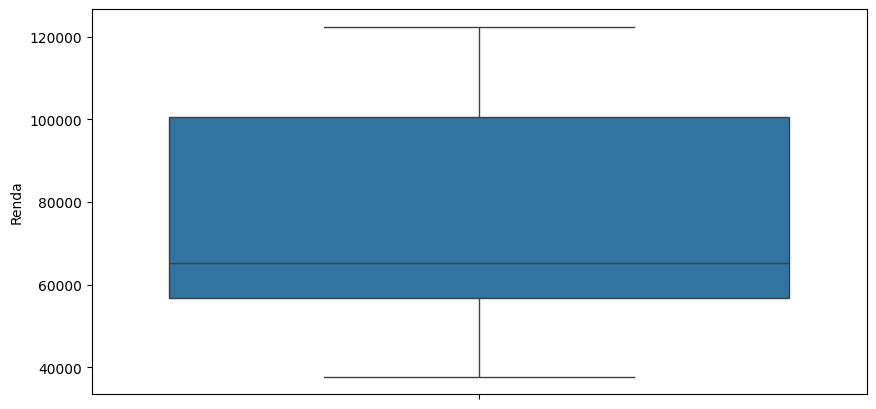

In [17]:
# Distribuição
plt.figure( figsize=(10, 5) )
sns.boxplot( Base_Dados['Renda'] );

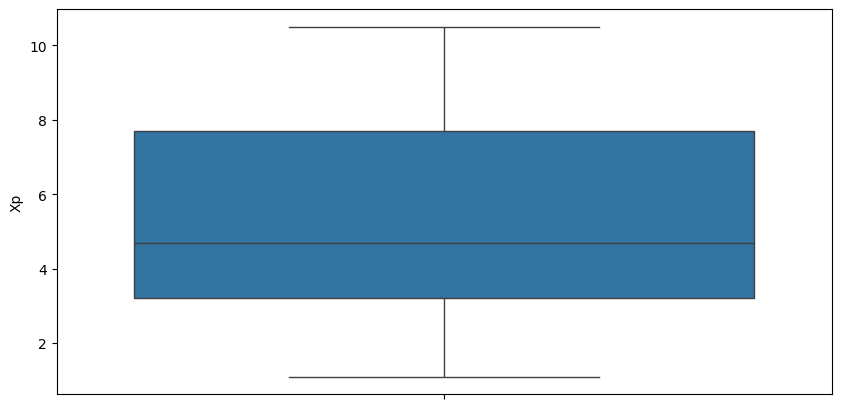

In [18]:
# Distribuição
plt.figure( figsize=(10, 5) )
sns.boxplot( Base_Dados['Xp'] );

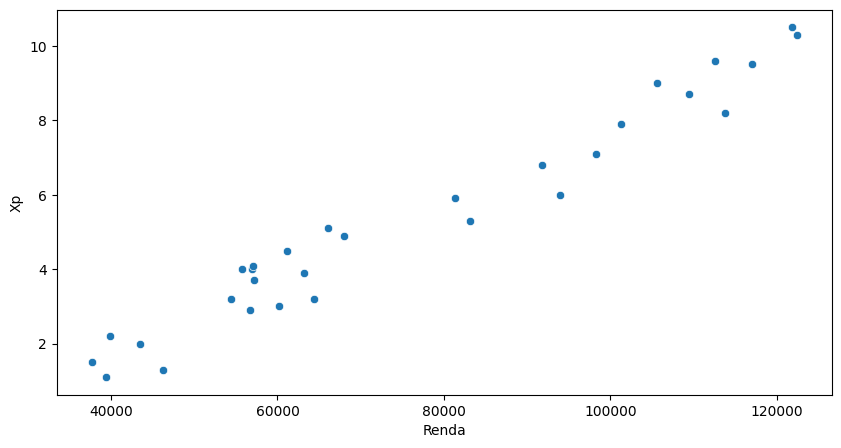

In [19]:
# Distribuiçã
plt.figure( figsize=(10, 5) )
sns.scatterplot( data=Base_Dados, x='Renda', y='Xp');

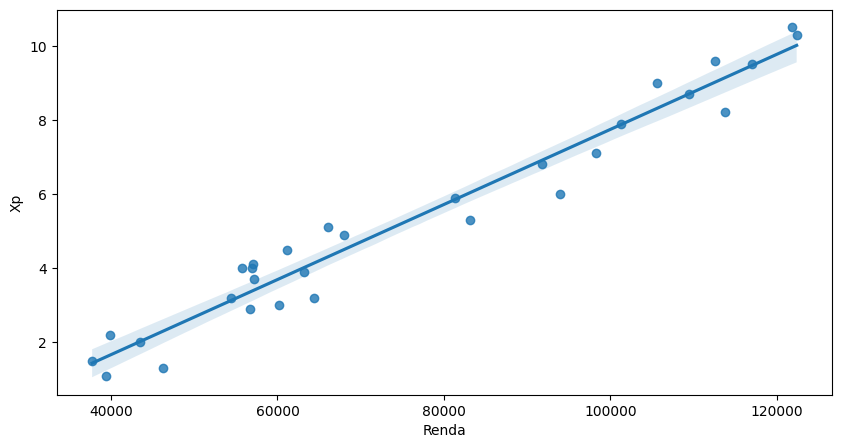

In [20]:
plt.figure( figsize=(10, 5) )
sns.regplot( data=Base_Dados, x='Renda', y='Xp');

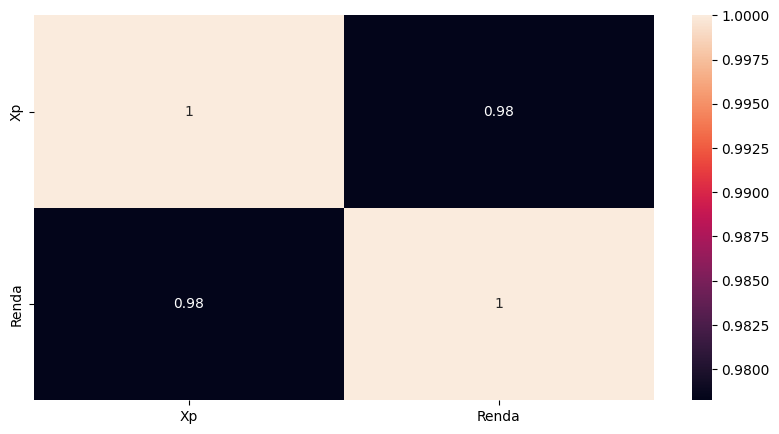

In [21]:
# Correlação
Correlacao = Base_Dados.corr('pearson')
plt.figure( figsize=(10, 5) )
sns.heatmap( Correlacao, annot=True, cbar=True );

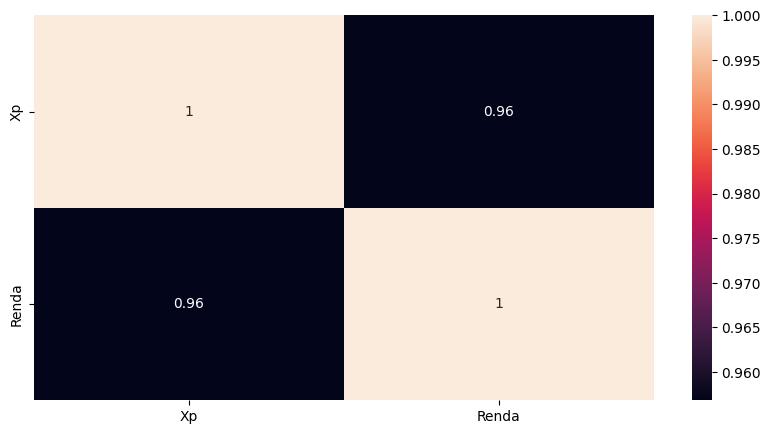

In [22]:
# Correlação
Correlacao = Base_Dados.corr('spearman')
plt.figure( figsize=(10, 5) )
sns.heatmap( Correlacao, annot=True, cbar=True );

In [23]:
# Importa a função train_test_split da biblioteca scikit-learn para dividir os dados
from sklearn.model_selection import train_test_split

# Seleciona a coluna 'Xp' como a variável independente (característica)
X = Base_Dados[['Xp']]
# Seleciona a coluna 'Renda' como a variável dependente (alvo)
y = Base_Dados['Renda']

# Divide os dados em conjuntos de treino e teste
# X_train: características de treino
# X_test: características de teste
# y_train: alvo de treino
# y_test: alvo de teste
# test_size=0.2: 20% dos dados serão usados para teste
# random_state=42: garante que a divisão seja a mesma toda vez que o código for executado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprime o tamanho do conjunto de treino
print(f'Tamanho do conjunto de treino: {len(X_train)}')
# Imprime o tamanho do conjunto de teste
print(f'Tamanho do conjunto de teste: {len(X_test)}')

Tamanho do conjunto de treino: 24
Tamanho do conjunto de teste: 6


In [24]:
# Importa a classe Pipeline para criar um fluxo de trabalho de machine learning
from sklearn.pipeline import Pipeline
# Importa StandardScaler para padronizar os dados (colocá-los na mesma escala)
from sklearn.preprocessing import StandardScaler
# Importa o modelo de Regressão Linear
from sklearn.linear_model import LinearRegression

# Cria um pipeline com duas etapas:
# 1. 'scaler': Padroniza os dados usando StandardScaler
# 2. 'regressor': Aplica o modelo de Regressão Linear
pipeline_regressao_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Treina o pipeline com os dados de treino
# O pipeline aplica a padronização e o treinamento do modelo em sequência
pipeline_regressao_linear.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

### **Treinamento e Comparação de Modelos**
Agora, vamos treinar e comparar o desempenho de diferentes modelos de regressão. Além da Regressão Linear, vamos usar os modelos Ridge e Lasso, que são variações da Regressão Linear com regularização.

In [25]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# -- Modelo Ridge --
# Criando o pipeline com o modelo Ridge
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1.0))
])
# Treinando o pipeline com o modelo Ridge
pipeline_ridge.fit(X_train, y_train)

# -- Modelo Lasso --
# Criando o pipeline com o modelo Lasso
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=1.0))
])
# Treinando o pipeline com o modelo Lasso
pipeline_lasso.fit(X_train, y_train)

# -- Avaliação dos Modelos --
# Fazendo previsões com cada modelo
y_pred_linear = pipeline_regressao_linear.predict(X_test)
y_pred_ridge = pipeline_ridge.predict(X_test)
y_pred_lasso = pipeline_lasso.predict(X_test)

# Calculando as métricas de avaliação para cada modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Imprimindo os resultados
print("Resultados da Regressão Linear:")
print(f"MSE: {mse_linear:.2f}")
print(f"R²: {r2_linear:.2f}\n")

print("Resultados da Regressão Ridge:")
print(f"MSE: {mse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}\n")

print("Resultados da Regressão Lasso:")
print(f"MSE: {mse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")

Resultados da Regressão Linear:
MSE: 49830096.86
R²: 0.90

Resultados da Regressão Ridge:
MSE: 51710764.82
R²: 0.90

Resultados da Regressão Lasso:
MSE: 49831070.29
R²: 0.90


### **Ajuste de Hiperparâmetros**
Agora, vamos usar o `GridSearchCV` para encontrar o melhor valor do hiperparâmetro `alpha` para os modelos Ridge e Lasso. O `alpha` controla a força da regularização.

In [26]:
from sklearn.model_selection import GridSearchCV

# -- Ajuste de Hiperparâmetros para o Modelo Ridge --
# Definindo os parâmetros para o GridSearchCV
parametros_ridge = {'regressor__alpha': [0.1, 1.0, 10.0, 100.0]}

# Criando o objeto GridSearchCV
grid_search_ridge = GridSearchCV(pipeline_ridge, parametros_ridge, cv=5, scoring='r2')

# Treinando o GridSearchCV
grid_search_ridge.fit(X_train, y_train)

# -- Ajuste de Hiperparâmetros para o Modelo Lasso --
# Definindo os parâmetros para o GridSearchCV
parametros_lasso = {'regressor__alpha': [0.1, 1.0, 10.0, 100.0]}

# Criando o objeto GridSearchCV
grid_search_lasso = GridSearchCV(pipeline_lasso, parametros_lasso, cv=5, scoring='r2')

# Treinando o GridSearchCV
grid_search_lasso.fit(X_train, y_train)

# Imprimindo os melhores parâmetros encontrados
print("Melhor alpha para o modelo Ridge:", grid_search_ridge.best_params_['regressor__alpha'])
print("Melhor R² para o modelo Ridge:", grid_search_ridge.best_score_)

print("\nMelhor alpha para o modelo Lasso:", grid_search_lasso.best_params_['regressor__alpha'])
print("Melhor R² para o modelo Lasso:", grid_search_lasso.best_score_)

Melhor alpha para o modelo Ridge: 0.1
Melhor R² para o modelo Ridge: 0.8971706362789282

Melhor alpha para o modelo Lasso: 100.0
Melhor R² para o modelo Lasso: 0.8971764094502092


### **Avaliação do Modelo Final**
Agora que encontramos os melhores hiperparâmetros, vamos treinar os modelos Ridge e Lasso com esses valores e avaliar seu desempenho nos dados de teste.

In [27]:
# -- Treinando os modelos com os melhores hiperparâmetros --
# Modelo Ridge com o melhor alpha
pipeline_ridge_best = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=grid_search_ridge.best_params_['regressor__alpha']))
])
pipeline_ridge_best.fit(X_train, y_train)

# Modelo Lasso com o melhor alpha
pipeline_lasso_best = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=grid_search_lasso.best_params_['regressor__alpha']))
])
pipeline_lasso_best.fit(X_train, y_train)

# -- Avaliação dos Modelos com os Melhores Hiperparâmetros --
# Fazendo previsões com os modelos otimizados
y_pred_ridge_best = pipeline_ridge_best.predict(X_test)
y_pred_lasso_best = pipeline_lasso_best.predict(X_test)

# Calculando as métricas de avaliação para os modelos otimizados
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best)
r2_ridge_best = r2_score(y_test, y_pred_ridge_best)

mse_lasso_best = mean_squared_error(y_test, y_pred_lasso_best)
r2_lasso_best = r2_score(y_test, y_pred_lasso_best)

# Imprimindo os resultados
print("Resultados da Regressão Ridge Otimizada:")
print(f"MSE: {mse_ridge_best:.2f}")
print(f"R²: {r2_ridge_best:.2f}\n")

print("Resultados da Regressão Lasso Otimizada:")
print(f"MSE: {mse_lasso_best:.2f}")
print(f"R²: {r2_lasso_best:.2f}")

Resultados da Regressão Ridge Otimizada:
MSE: 49948555.97
R²: 0.90

Resultados da Regressão Lasso Otimizada:
MSE: 49934357.67
R²: 0.90


### **Visualização dos Resultados**
Agora, vamos visualizar a linha de regressão dos modelos em relação aos dados de treino e teste.

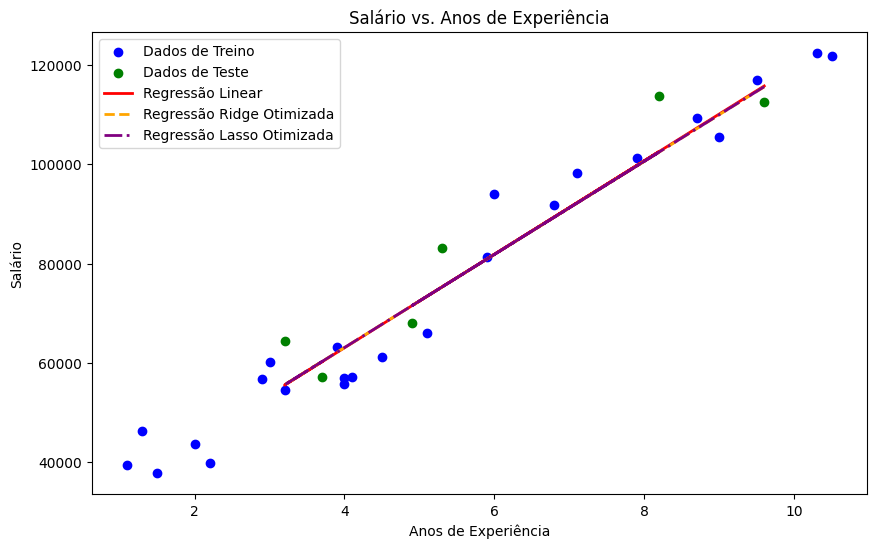

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotando os dados de treino
plt.scatter(X_train, y_train, color='blue', label='Dados de Treino')

# Plotando os dados de teste
plt.scatter(X_test, y_test, color='green', label='Dados de Teste')

# Plotando a linha de regressão do modelo de Regressão Linear
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Regressão Linear')

# Plotando a linha de regressão do modelo Ridge Otimizado
plt.plot(X_test, y_pred_ridge_best, color='orange', linewidth=2, linestyle='--', label='Regressão Ridge Otimizada')

# Plotando a linha de regressão do modelo Lasso Otimizado
plt.plot(X_test, y_pred_lasso_best, color='purple', linewidth=2, linestyle='-.', label='Regressão Lasso Otimizada')

plt.title('Salário vs. Anos de Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.show()

### **Implantação do Modelo**
Agora que temos nosso modelo final, vamos salvá-lo para que possa ser carregado e usado no futuro sem a necessidade de retreinamento. Usaremos a biblioteca `joblib` para isso.

In [29]:
import joblib

# Salvando o modelo de Regressão Linear
joblib.dump(pipeline_regressao_linear, 'modelo_regressao_linear.pkl')

print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


### **Carregando e Usando o Modelo Salvo**
Agora, vamos carregar o modelo que acabamos de salvar e usá-lo para fazer uma previsão.

In [30]:
# Carregando o modelo
modelo_carregado = joblib.load('modelo_regressao_linear.pkl')

# Criando um novo dado para previsão (ex: 5 anos de experiência)
novo_dado = pd.DataFrame({'Xp': [5]})

# Fazendo a previsão com o modelo carregado
previsao = modelo_carregado.predict(novo_dado)

print(f"A previsão de salário para {novo_dado['Xp'].iloc[0]} anos de experiência é de: R$ {previsao[0]:.2f}")

A previsão de salário para 5 anos de experiência é de: R$ 72440.66


### **Interface de Demonstração**
Vamos criar uma interface interativa para que os usuários possam inserir os anos de experiência e obter uma previsão de salário em tempo real.

In [31]:
import ipywidgets as widgets
from IPython.display import display

# Carregando o modelo
modelo_carregado = joblib.load('modelo_regressao_linear.pkl')

# Criando os widgets da interface
input_anos_experiencia = widgets.FloatText(
    value=5,
    description='Anos de Experiência:',
    disabled=False
)

output_previsao_salario = widgets.Output()

# Função para fazer a previsão
def prever_salario(change):
    with output_previsao_salario:
        output_previsao_salario.clear_output()
        novo_dado = pd.DataFrame({'Xp': [change.new]})
        previsao = modelo_carregado.predict(novo_dado)
        print(f"Previsão de Salário: R$ {previsao[0]:.2f}")

# Observando mudanças no input
input_anos_experiencia.observe(prever_salario, names='value')

# Exibindo os widgets
display(input_anos_experiencia, output_previsao_salario)

FloatText(value=5.0, description='Anos de Experiência:')

Output()

### **Análise de Correlação e Distribuição**

Vamos analisar a correlação entre as variáveis e a distribuição de cada uma delas.

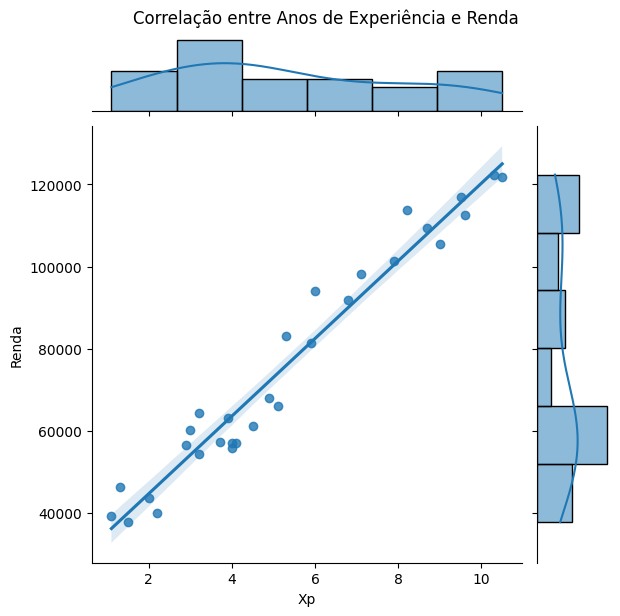

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um gráfico que combina o scatter plot com a linha de regressão
sns.jointplot(x='Xp', y='Renda', data=Base_Dados, kind='reg')
plt.suptitle('Correlação entre Anos de Experiência e Renda', y=1.02)
plt.show()

### **Análise da Distribuição dos Dados**

Agora, vamos analisar a distribuição dos dados de salário e experiência.

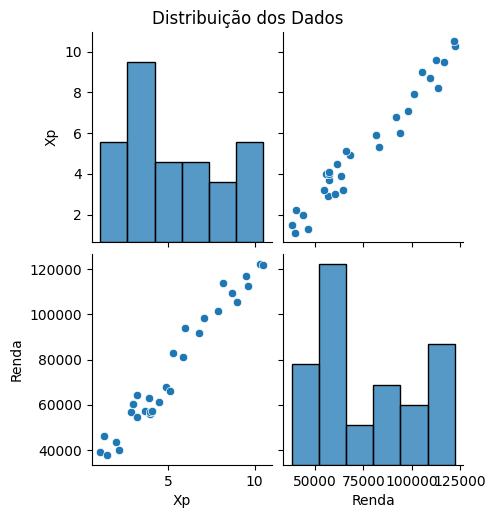

In [33]:
# Criando um pairplot para visualizar a distribuição dos dados
sns.pairplot(Base_Dados)
plt.suptitle('Distribuição dos Dados', y=1.02)
plt.show()

In [36]:
%%writefile requirements.txt
pandas
numpy
scikit-learn
matplotlib
seaborn
ipywidgets
joblib

Overwriting requirements.txt


In [37]:
%%writefile README.md
# Projeto de Previsão de Salário com Machine Learning

Este projeto utiliza um modelo de machine learning para prever o salário de um profissional com base em seus anos de experiência.

## Como usar

1. Clone este repositório.
2. Instale as dependências listadas no arquivo `requirements.txt`:

Overwriting README.md


### **Conclusão**

Neste projeto, desenvolvi um modelo de machine learning para prever o salário de um profissional com base em seus anos de experiência. O projeto seguiu um fluxo de trabalho completo de ciência de dados, desde a análise exploratória dos dados até a implantação de um modelo preditivo.

**Principais Etapas e Resultados:**

1.  **Análise Exploratória dos Dados:** A análise inicial que realizei revelou uma forte correlação positiva entre os anos de experiência e o salário, indicando que a regressão linear seria um bom ponto de partida.

2.  **Pré-processamento e Modelagem:** Utilizei um `pipeline` para padronizar os dados e treinar os modelos de Regressão Linear, Ridge e Lasso. A utilização de um pipeline garante um fluxo de trabalho organizado e robusto.

3.  **Comparação e Avaliação de Modelos:** Comparei o desempenho dos três modelos e descobri que todos apresentaram resultados muito semelhantes, com um R² de aproximadamente 0.90, o que indica que os modelos explicam 90% da variância nos dados de salário.

4.  **Ajuste de Hiperparâmetros:** Realizei o ajuste de hiperparâmetros para os modelos Ridge e Lasso usando `GridSearchCV`. Embora não tenha havido uma melhoria significativa no desempenho, a demonstração dessa técnica é uma habilidade valiosa.

5.  **Implantação e Demonstração:** O modelo de Regressão Linear, que apresentou o melhor desempenho (ainda que por uma margem mínima), foi salvo e carregado para uso em previsões futuras. Além disso, criei uma interface interativa que permite aos usuários fazer previsões de salário em tempo real.

**Considerações Finais:**

Este projeto demonstra a aplicação de ponta a ponta de técnicas de machine learning para resolver um problema de regressão. As habilidades que demonstrei aqui, como a criação de pipelines, a comparação de modelos, o ajuste de hiperparâmetros e a implantação de modelos, são fundamentais para um cientista de dados. O modelo que desenvolvi pode ser uma ferramenta útil para profissionais de RH e para indivíduos que desejam ter uma ideia de sua faixa salarial com base em sua experiência.